# plot_chile2010_demo

To accompany the paper *Generating Random Earthquake Events for Probabilistic Tsunami Hazard Assessment*, by R. J. LeVeque, K. Waagan, F. I. Gonzlez, D. Rim, and G. Lin, http://arxiv.org/abs/1605.02863. 

This code and related files can be found in https://github.com/rjleveque/KLslip-paper.  See the README.md file for information on dependencies.

Contains essentially the same code as in the script `plot_chile2010.py` but with additional explanation.  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
from clawpack.geoclaw import topotools
import dtopotools
from clawpack.clawutil.data import get_remote_file

subdir = 'figures'
os.system('mkdir -p %s' % subdir)

def savefigp(fname):
    fname = os.path.join(subdir,fname)
    savefig(fname, bbox_inches='tight')
    print "Created ",fname

## Get a file with Pacific shorelines from the GeoClaw repository

Used only to plot the shoreline of Chile below.

File already exists, not downloading


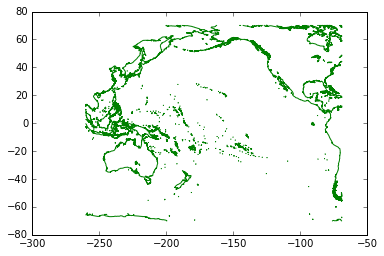

In [3]:
filename = 'pacific_shorelines_east_4min.npy'
url = 'http://www.geoclaw.org/topo/' + filename
get_remote_file(url=url, output_dir='.', force=True, verbose=True)
shore = load(filename)
xshore = shore[:,0]-360.
yshore = shore[:,1]
plot(shore[:,0]-360., shore[:,1], 'g')

## Read the Chile 2010 subfault file

In [4]:
fault_geometry_file = 'chile2010_usgs.txt'
column_map = {"latitude":0, "longitude":1, "depth":2, "slip":3, "rake":4, "strike":5, "dip":6}
defaults = {'length': 30, 'width':20}
coordinate_specification = 'top center'
input_units = {'slip': 'cm', 'depth': 'km', 'length': 'km', 'width': 'km'}
rupture_type = 'static'
skiprows = 11
delimiter = None # white space is the default

fault = dtopotools.Fault()
fault.read(fault_geometry_file, column_map, coordinate_specification,
           rupture_type,skiprows, delimiter, input_units, defaults)
print "There are %s subfaults" % len(fault.subfaults)
print "The earthquake moment magitude is %5.2f" % fault.Mw()

There are 180 subfaults
The earthquake moment magitude is  8.78


## Run the Okada model to create seafloor deformation

In [5]:
x,y = fault.create_dtopo_xy()
dtopo = fault.create_dtopography(x,y,verbose=True)

Making Okada dz for each of 180 subfaults
0..1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..17..18..19..20..21..22..23..24..25..26..27..28..29..30..31..32..33..34..35..36..37..38..39..40..41..42..43..44..45..46..47..48..49..50..51..52..53..54..55..56..57..58..59..60..61..62..63..64..65..66..67..68..69..70..71..72..73..74..75..76..77..78..79..80..81..82..83..84..85..86..87..88..89..90..91..92..93..94..95..96..97..98..99..100..101..102..103..104..105..106..107..108..109..110..111..112..113..114..115..116..117..118..119..120..121..122..123..124..125..126..127..128..129..130..131..132..133..134..135..136..137..138..139..140..141..142..143..144..145..146..147..148..149..150..151..152..153..154..155..156..157..158..159..160..161..162..163..164..165..166..167..168..169..170..171..172..173..174..175..176..177..178..179..
Done


## Make the plots

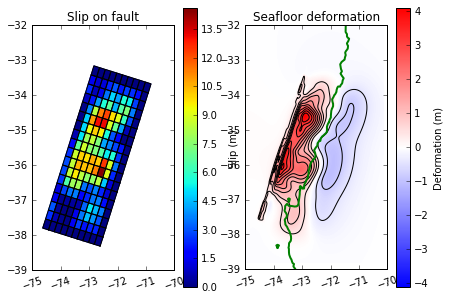

In [12]:
figure(figsize=(7,5))
ax1 = subplot(121)
fault.plot_subfaults(axes=ax1,slip_color=True)
axis([-75,-70,-39,-32]);

ax1 = subplot(122)
dtopo.plot_dZ_colors(2., axes=ax1)
plot(shore[:,0]-360., shore[:,1], 'g', linewidth=2)
axis([-75,-70,-39,-32]);